In [1]:
from Classification import SVMClassification, XGBoostClassification, RFClassification, DTClassification
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

report_svm = []
report_svm_oversamples = []
report_xgb = []
report_xgb_oversamples = []
report_rf = []
report_rf_oversamples = []
report_dt = []
report_dt_oversamples = []

for i in range(1, 6):
    scores = SVMClassification(None, 0, False, i, False)
    report_svm.append(scores)

    scores = SVMClassification(None, 0, True, i, False)
    report_svm_oversamples.append(scores)

    scores = XGBoostClassification(None, 0, False, i, False)
    report_xgb.append(scores)

    scores = XGBoostClassification(None, 0, True, i, False)
    report_xgb_oversamples.append(scores)

    scores = RFClassification(None, 0, False, i, False)
    report_rf.append(scores)

    scores = RFClassification(None, 0, True, i, False)
    report_rf_oversamples.append(scores)

    scores = DTClassification(None, 0, False, i, False)
    report_dt.append(scores)

    scores = DTClassification(None, 0, True, i, False)
    report_dt_oversamples.append(scores)


print(report_svm)
print(report_svm_oversamples)
print(report_xgb)
print(report_xgb_oversamples)
print(report_rf)
print(report_rf_oversamples)
print(report_dt)
print(report_dt_oversamples)
# fig, ax = plot_confusion_matrix(conf_mat=scores["confusion_matrix"], show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
# plt.show()


[{'accuracy': 0.9792870905587668, 'precision': 0.9479297365119197, 'f_score': 0.9590606156775627, 'recall': 0.970456005138086, 'confusion_matrix': array([[4588,   83],
       [  46, 1511]])}, {'accuracy': 0.9823378291586384, 'precision': 0.9634849455477258, 'f_score': 0.964720974983964, 'recall': 0.9659601798330122, 'confusion_matrix': array([[4614,   57],
       [  53, 1504]])}, {'accuracy': 0.9741490044958253, 'precision': 0.9313967861557478, 'f_score': 0.9492913385826771, 'recall': 0.9678869621066153, 'confusion_matrix': array([[4560,  111],
       [  50, 1507]])}, {'accuracy': 0.9754335260115607, 'precision': 0.9382022471910112, 'f_score': 0.9515669515669516, 'recall': 0.9653179190751445, 'confusion_matrix': array([[4572,   99],
       [  54, 1503]])}, {'accuracy': 0.9794476557482338, 'precision': 0.9451713395638629, 'f_score': 0.9595192915876027, 'recall': 0.9743095696852923, 'confusion_matrix': array([[4583,   88],
       [  40, 1517]])}]
[{'accuracy': 0.9751123956326269, 'precis

In [9]:
reports = [report_svm,
report_svm_oversamples,
report_xgb,
report_xgb_oversamples,
report_rf,
report_rf_oversamples,
report_dt,
report_dt_oversamples]

names = [
"svm",
"svm_oversamples",
"xgb",
"xgb_oversamples",
"rf",
"rf_oversamples",
"dt",
"dt_oversamples"]

new_results =  {}

for model_result,name in zip(reports,names):
    max_accuracy = 0
    split = 0
    avg_accuracy = 0
    confusion_matrix = None
    for index,result in enumerate(model_result):
        avg_accuracy += result["accuracy"]
        if result["accuracy"] > max_accuracy:
            max_accuracy = result["accuracy"]
            split = index
            confusion_matrix = result["confusion_matrix"]
    avg_accuracy = avg_accuracy/5
    new_results[name] = {"max_accuracy": max_accuracy, "split": split, "avg_accuracy": avg_accuracy, "confusion_matrix": confusion_matrix}


new_results

{'svm': {'max_accuracy': 0.9823378291586384,
  'split': 1,
  'avg_accuracy': 0.9781310211946049,
  'confusion_matrix': array([[4614,   57],
         [  53, 1504]])},
 'svm_oversamples': {'max_accuracy': 0.9775208734746307,
  'split': 4,
  'avg_accuracy': 0.9746628131021196,
  'confusion_matrix': array([[4563,  108],
         [  32, 1525]])},
 'xgb': {'max_accuracy': 0.9686897880539499,
  'split': 2,
  'avg_accuracy': 0.9645793192035967,
  'confusion_matrix': array([[4550,  121],
         [  74, 1483]])},
 'xgb_oversamples': {'max_accuracy': 0.9661207450224791,
  'split': 2,
  'avg_accuracy': 0.9613359023763648,
  'confusion_matrix': array([[4526,  145],
         [  66, 1491]])},
 'rf': {'max_accuracy': 0.9751123956326269,
  'split': 1,
  'avg_accuracy': 0.9718047527296081,
  'confusion_matrix': array([[4642,   29],
         [ 126, 1431]])},
 'rf_oversamples': {'max_accuracy': 0.974630700064226,
  'split': 1,
  'avg_accuracy': 0.9710661528580603,
  'confusion_matrix': array([[4625,   46

In [10]:
import seaborn as sns

def plot_model_plot(labels, scores):
    plt.figure()
    ax = sns.barplot(x=labels, y=scores)
    ax.set_title("Trained Models Accuracy")
    for container in ax.containers:
        ax.bar_label(container)


In [11]:
labels = ["SVM", "DT", "RF", "XGB"]
scores = [new_results["svm"]["avg_accuracy"], new_results["dt"]["avg_accuracy"], new_results["rf"]["avg_accuracy"], new_results["xgb"]["avg_accuracy"]]


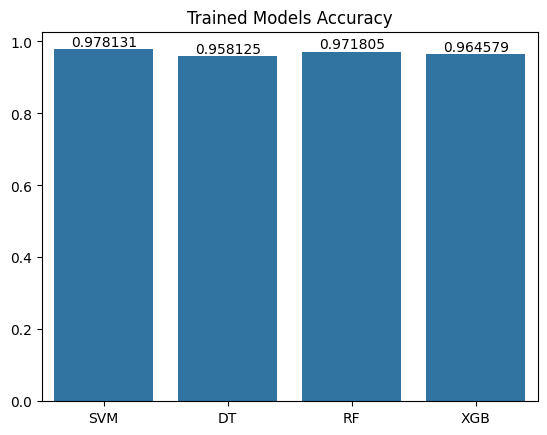

In [12]:
plot_model_plot(labels, scores)
plt.show()

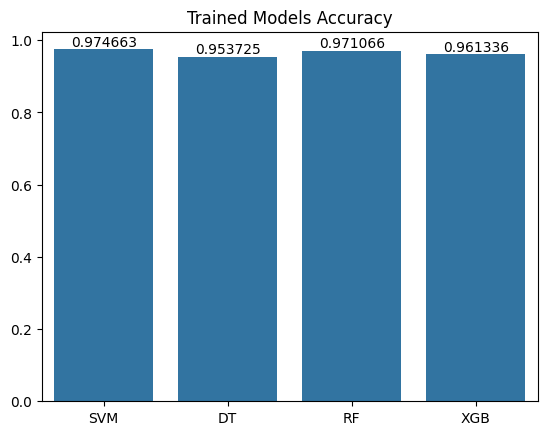

In [14]:
labels_os = ["SVM", "DT", "RF", "XGB"]
scores_os = [new_results["svm_oversamples"]["avg_accuracy"], new_results["dt_oversamples"]["avg_accuracy"], new_results["rf_oversamples"]["avg_accuracy"], new_results["xgb_oversamples"]["avg_accuracy"]]
plot_model_plot(labels_os, scores_os)
plt.show()

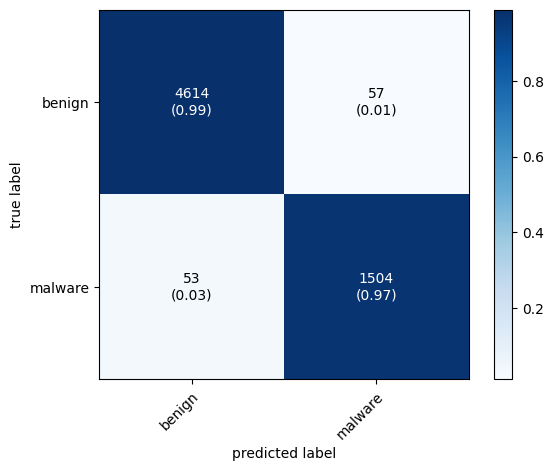

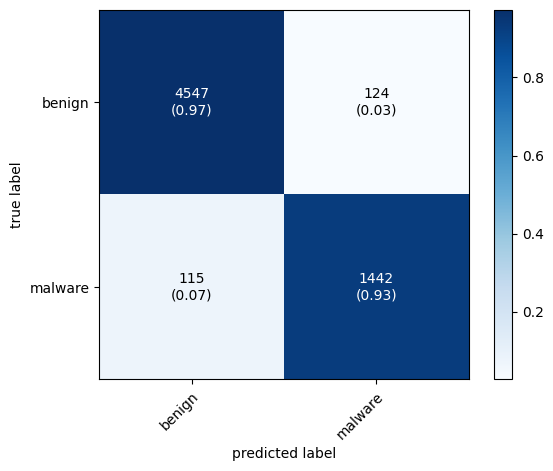

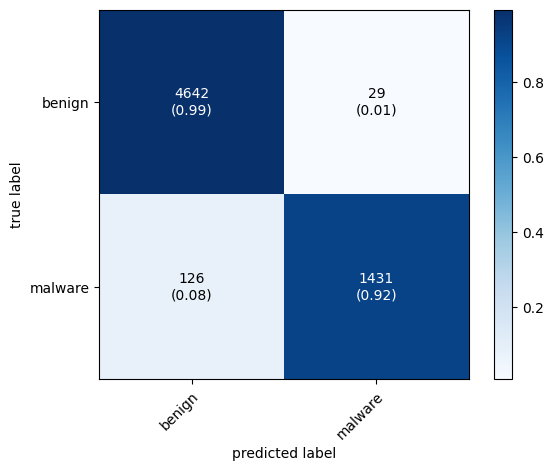

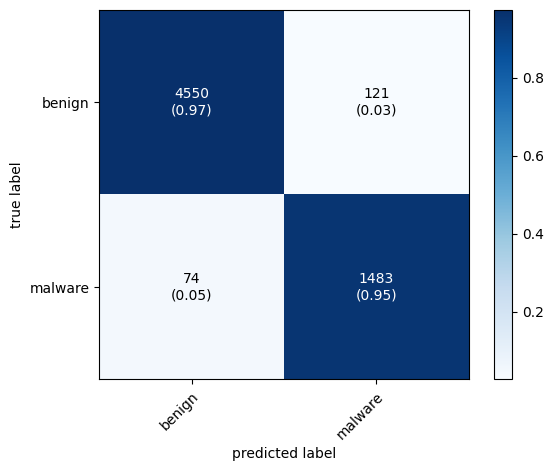

In [16]:
fig, ax = plot_confusion_matrix(conf_mat=new_results["svm"]["confusion_matrix"], show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=new_results["dt"]["confusion_matrix"], show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=new_results["rf"]["confusion_matrix"], show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

fig, ax = plot_confusion_matrix(conf_mat=new_results["xgb"]["confusion_matrix"], show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()